# Analisi della regressione lineare semplice

Disponiamo dell'età e della pressione arteriosa di 36 uomini ritenuti in buone
condizioni di salute. I dati, ordinati per età crescente, sono disponibili nel file "pressione_arteriosa.csv", che possiamo importare in una variabile della classe *data frame* denominata `pressione_df`.

In [1]:
library(tidyverse)
pressione_df <- read.csv("data/pressione_arteriosa.csv")
class(pressione_df)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "data.frame"

Un *data frame* ricordiamo che è una tabella di dati, in cui  ogni colonna può essere di un tipo diverso. 
In questo caso, abbiamo solo due colonne numeriche. 
Visualizza 
* le prime righe del *data frame* `pressione_df` 

In [2]:
head(pressione_df)

,id_paziente,eta,pressione_arteriosa_mmHg
,<fct>,<int>,<int>
1,paziente_01,33,127
2,paziente_02,37,126
3,paziente_03,38,118
4,paziente_04,39,113
5,paziente_05,39,126
6,paziente_06,40,120


* informazioni sul tipo di variabili per ogni colonna del *data frame* con la funzione `str()`

In [3]:
str(pressione_df)

'data.frame':	36 obs. of  3 variables:
 $ id_paziente             : Factor w/ 36 levels "paziente_01",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ eta                     : int  33 37 38 39 39 40 42 43 44 47 ...
 $ pressione_arteriosa_mmHg: int  127 126 118 113 126 120 132 122 134 147 ...


* statistiche descrittive delle due variabili in gioco, usando la funzione `summary()`

In [4]:
summary(pressione_df)

      id_paziente      eta        pressione_arteriosa_mmHg
 paziente_01: 1   Min.   :33.00   Min.   :113.0           
 paziente_02: 1   1st Qu.:46.25   1st Qu.:126.8           
 paziente_03: 1   Median :51.50   Median :135.5           
 paziente_04: 1   Mean   :51.89   Mean   :138.1           
 paziente_05: 1   3rd Qu.:57.25   3rd Qu.:148.0           
 paziente_06: 1   Max.   :75.00   Max.   :172.0           
 (Other)    :30                                           

Per comodità, assegna ai vettori `x_eta` e `y_pressione` le colonne/variabili che intendi utilizzare, rispettivamente, come *variabile indipendente* (detta anche *regressore*, *covariata* o *predittore*) e come *variabile dipendente* (o di risposta) nell'analisi della regressione lineare semplice. 

In [5]:
x_eta <- pressione_df$eta
y_pressione <- pressione_df$pressione_arteriosa_mmHg

Esplora graficamente l'associazione lineare della variabile `y_pressione` con la variabile `x_eta`, attraverso un grafico a dispersione, ed osserva come i punti tendono ad allinearsi o comunque ad essere positivamente correlati.

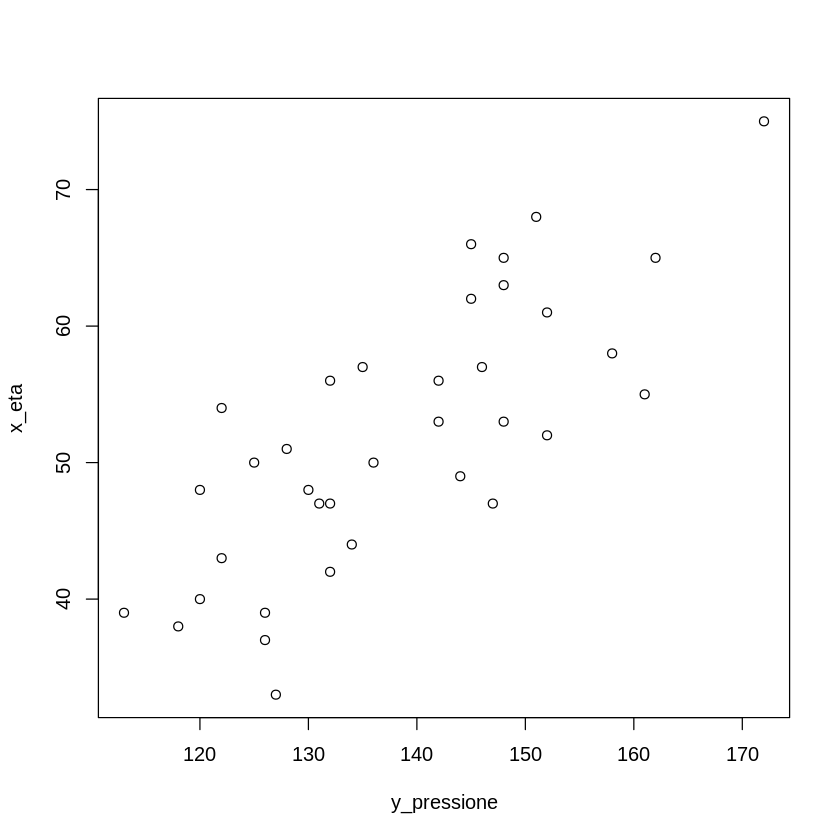

In [6]:
plot(y_pressione, x_eta)

## Analisi della regressione con la funzione `lm()` (linear model)

Ipotizza quindi un modello di regressione lineare semplice tra le variabili, ossia $$y = \beta_0 + \beta_1 x + \varepsilon$$ che puoi stimare in `R` attraverso la funzione `lm()` (ossia puoi stimarne i coefficienti di regressione o i parametri $\hat{\beta_1}$ di $\beta_1$ e $\hat\beta_0$ di $\beta_0$).
La funzione `lm()` consente di lavorare direttamente sui *data frame*, oltreché ovviamente, come in questo caso, sui vettori colonna `x _eta` e `y_pressione`.

La sintassi di `lm()` è
`lm(variabile_di_risposta ~ variabile indipendente)`

Suggerimento: il carattere `~` si può ottenere con la combinazione di tasti ALT+5 (utenti MAC) o ALT+126 (utenti Windows).

L'oggetto restituito dalla funzione `lm()` è di classe `'lm'` e deve, come per ogni funzione, essere memorizzato in una variabile definita da te. Nel seguente esempio la chiamiamo `modello_regressione`. 

In [7]:
modello_regressione <- lm(y_pressione ~ x_eta)
modello_regressione <- lm(pressione_arteriosa_mmHg ~ eta, data=pressione_df) #equivalente
class(modello_regressione)

[1] "lm"

Nella variabile `modello_regressione` sono conservate tutte le informazioni dell'analisi di regressione lineare semplice, che puoi visualizzare sinteticamente attraverso il comando `summary()` e salvarlo per comodità nella variabile `reg.summary`. Nel seguito proveremo ad interpretare tale output e ricavarne informazioni per l'interpretazione del modello. 

In [8]:
reg.summary <- summary(modello_regressione)
reg.summary


Call:
lm(formula = pressione_arteriosa_mmHg ~ eta, data = pressione_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.462  -5.343  -0.678   5.714  19.424 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  80.3267     8.1486   9.858 1.68e-11 ***
eta           1.1136     0.1544   7.214 2.40e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.984 on 34 degrees of freedom
Multiple R-squared:  0.6049,	Adjusted R-squared:  0.5932 
F-statistic: 52.04 on 1 and 34 DF,  p-value: 2.396e-08


Le stime $\hat \beta_0$ e $\hat \beta_1$ dei coefficienti di regressione $\beta_0$ e $\beta_1$ sono contenuti in `modello_regressione$coefficients` e possono essere assegnate alle variabili `beta1_hat` e `beta0_hat` tramite le istruzioni seguenti.

In [9]:
modello_regressione$coefficients
beta0_hat <- modello_regressione$coefficients[[1]]
beta1_hat <-modello_regressione$coefficients[[2]]

(Intercept)         eta 
  80.326686    1.113618

Puoi quindi disegnare la retta di regressione

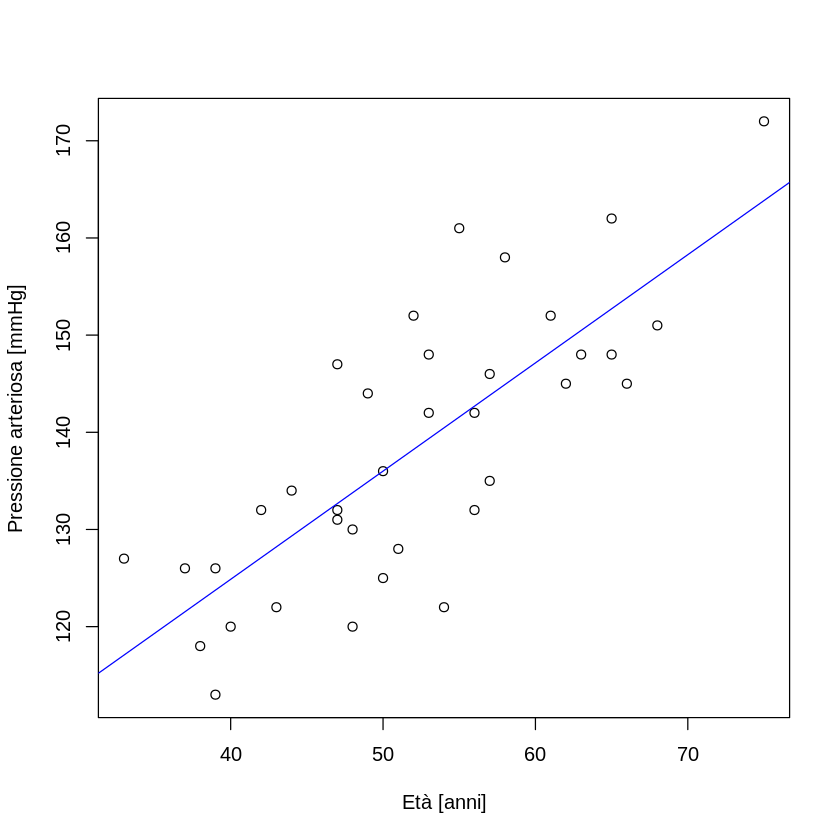

In [10]:
plot(x_eta, y_pressione, 
     xlab = "Età [anni]", ylab = "Pressione arteriosa [mmHg]")
abline(a = beta0_hat, #intercetta
       b = beta1_hat, #coefficiente angolare
        col = "blue") 

## Intervalli di confidenza su intercetta e coefficiente angolare della retta di regressione
Analogamente all'intervallo di confidenza per la media della variabile di risposta, introdotto nel video "Descrizione, inferenza, previsione", l'intervallo di confidenza al livello di fiducia $1-\alpha$ per $\beta_0$ (risp. $\beta_1$) è l'intervallo, calcolato sulla base del campione sperimentale, che contiene, con fiducia pari ad $1-\alpha$, il valore vero di $\beta_0$ (risp. $\beta_1$). $\alpha$ è un valore compreso tra 0 e 1, tipicamente posto pari a 0.05. 



Ricorda che l'intervallo di confidenza al livello di fiducia $1-\alpha=0.95$ per la media $\mu$ della variabile di risposta, è pari a

$$\left( \bar y - t_{0.975,n-1} \hat \sigma_{\bar y}, \bar y + t_{0.975,n-1} \hat \sigma_{\bar y} \right)$$

dove $t_{0.975,\nu}$ indica il quantile 0.975 della distribuzione $t$ di Student, con $\nu$ gradi di libertà,
e $\hat \sigma_{\bar y}=\frac{s}{\sqrt{n}}$.

In analogia, anche gli intervalli di confidenza per $\beta_0$ e $\beta_1$ al livello di fiducia $1-\alpha$ sono centrati sulle stime $\hat \beta_0$ e $\hat \beta_1$ ed hanno  semiampiezza pari al prodotto della deviazione standard stimata di $\hat \beta_0$ e $\hat \beta_1$ per il quantile $t_{1-\alpha/2,\nu}$. Ossia 

$$\left( \hat \beta_0 - t_{1-\alpha/2,n-2} \hat \sigma_{\hat \beta_0}, \hat \beta_0 + t_{1-\alpha/2,n-2} \hat \sigma_{\hat \beta_0} \right)$$

e

$$\left( \hat \beta_1 - t_{1-\alpha/2,n-2} \hat \sigma_{\hat \beta_1}, \hat \beta_0 + t_{1-\alpha/2,n-2} \hat \sigma_{\hat \beta_1} \right).$$

Le stime $\hat \sigma_{\hat \beta_0}$ e $\hat \sigma_{\hat \beta_1}$ sono disponibili in `summary(modello_regressione)$coefficients[, "Std. Error"]` e puoi, per comodità di calcolo, assegnarle alle variabili `sigma_hat_beta0` e `sigma_hat_beta1`.

In [11]:
sigma_hat_beta0 <- summary(modello_regressione)$coefficients[, "Std. Error"][[1]]
sigma_hat_beta1 <- summary(modello_regressione)$coefficients[, "Std. Error"][[2]]
sigma_hat_beta0  %>% round(3)
sigma_hat_beta1  %>% round(3)

[1] 8.149

[1] 0.154

A questo punto, puoi finalmente calcolare gli intervalli richiesti, attraverso il seguente codice.

In [12]:
n <- length(y_pressione) #ampiezza campionaria
df <- modello_regressione$df.residual #ossia n-2
alfa <- 0.05
t_0975 <- qt(1-alfa/2, df)
I_beta1_sup <- beta1_hat + t_0975 * sigma_hat_beta1 #estremo superiore
I_beta1_inf <- beta1_hat - t_0975 * sigma_hat_beta1 #estremo inferiore
c(I_beta1_inf,I_beta1_sup) %>% round(2)

I_beta0_sup <- beta0_hat + t_0975 * sigma_hat_beta0 #estremo superiore
I_beta0_inf <- beta0_hat - t_0975 * sigma_hat_beta0 #estremo inferiore
c(I_beta0_inf,I_beta0_sup) %>% round(2)

[1] 0.80 1.43

[1] 63.77 96.89

Si può dimostrare che l'ampiezza di tali intervalli è direttamente proporzionale alla varianza dell'errore $\sigma_{\varepsilon}^2$ introdotto nel precedente video, che si dimostra essere pari a $\hat \sigma_{\varepsilon}^2 = \frac{1}{n - 2} \sum_{i=1}^n (y_i - \hat y_i)^2$. In `R` puoi calcolarlo come 

In [13]:
modello_regressione$df.residual #pari ad n-2 nel caso della regressione lineare semplice
eps <- modello_regressione$residuals %>% as.vector
sigma_eps_hat_squared <- sum(eps^2)/modello_regressione$df.residual
sigma_eps_hat_squared  %>% round(2)

[1] 34

[1] 80.72

Come hai appreso nel video precedente, la radice quadrata di $\hat \sigma_{\varepsilon}^2$, ossia la stima della deviazione standard dei residui, coincide con l'output `"Residual standard error"` di `summary(modello_regressione)`.

In [14]:
sqrt(sigma_eps_hat_squared)%>% round(3)

[1] 8.984

## Test di dipendenza lineare

Dovresti ricordare, dal video "Regressione lineare semplice - Interpretazione grafica", il significato di coefficiente di determinazione "R-squared" che nel caso della regressione semplice coincide con (`"Multiple R-squared"`) e di coefficiente di determinazione corretto o `"Adjusted R-squared"`. In particolare, quest'ultimo rappresenta la stima della frazione di varianza campionaria della variabile di risposta spiegata dal modello di regressione, e quindi in questo caso dalla sola variabile età. In `R `, nel caso della regressione semplice, sia `"Multiple R-squared"` che `"Adjusted R-squared"` possono essere calcolati in modo equivalente mediante le seguenti istruzioni.

In [15]:
#R-squared
cor(y_pressione,x_eta)^2
reg.summary$r.squared

#Adjusted R-squared
1-(reg.summary$sigma/sd(y_pressione))^2
reg.summary$adj.r.squared

[1] 0.6048564

[1] 0.6048564

[1] 0.5932345

[1] 0.5932345

Puoi dedurre che l'età spieghi circa il 60% della varianza della pressione arteriosa degli $n=36$ individui. 

Tuttavia, prima di prendere in considerazione tale valore, è buona norma verificare, attraverso un formale test, l'ipotesi di dipendenza lineare tra le variabili pressione arteriosa ed età sulla base delle osservazioni contenute in `y_pressione` e `x_eta`.

In particolare, vorremmo, sulla base dei dati in nostro possesso, poter rigettare l'ipotesi (detta nulla o predefinita) che non ci sia alcun legame lineare tra le variabili in esame (assenza di dipendenza lineare). 

In termini operativi, questo si traduce nel testare l'ipotesi, $H_0$: $\beta_1=0$ contro l'ipotesi alternativa $\beta_1\neq0$. Se $\beta_1$ risultasse nullo, come osservato nel video precedente, la vera retta di regressione sarebbe orizzontale e non ci sarebbe alcun vantaggio, in termini di incertezza (varianza), nell'utilizzo di un modello lineare tra pressione ed età, rispetto all'utilizzo della media $\mu$ della varibile di risposta.

Il modo più semplice per implementare questo test, è fissare un rischio di prima specie $\alpha$ (detto anche rischio di falso allarme o di falso positivo) che siamo disposti a correre di rigettare erroneamente l'ipotesi nulla. Quindi, rigettiamo l'ipotesi nulla, se l'intervallo di confidenza per $\beta_1$, al livello di fiducia $1-\alpha$ non include lo zero.

Nel nostro caso l'intervallo $(63.77,96.89)$ è ben lontano dall'includere lo zero e quindi possiamo concludere che 
*si può rigettare l'ipotesi di assenza di dipendenza lineare a favore dell'ipotesi alternativa di efficacia del fattore età, nella modellazione della pressione arteriosa, con un rischio di prima specie $\alpha= 0.05$.*

Hai quindi imparato come utilizzare formalmente l'intervallo di confidenza sul coefficiente angolare della retta di regressione, anche chiamato coefficiente di regressione della variabile età, per effettuare il test di dipendenza lineare tra le variabili pressione arteriosa ed età.

Nota che è possibile confondere (infatti abbiamo utilizzato la stessa lettera) il rischio di prima specie di un test delle ipotesi con la quantità $\alpha$, che definisce il livello di fiducia ($1-\alpha$) dell'intervallo di confidenza utilizzato per implementare tale test.

Un modo alternativo per formulare lo stesso test è utilizzare il valore in corrispondenza della riga `x_eta` e dell'ultima colonna (`Pr(>|t|`) che compare nella seguente tabella

In [16]:
reg.summary$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),80.326686,8.1485840,9.857748,1.681472e-11
eta,1.113618,0.1543648,7.214199,2.395771e-08


ossia il valore 

In [17]:
reg.summary$coefficients[, "Pr(>|t|)"][[2]]  %>% signif(digits = 4)

[1] 2.396e-08

denominato *p-value*. In quest'ottica, per rigettare l'ipotesi nulla $H_0$, bisogna verificare che il p-value sia minore del valore $\alpha$ prefissato, che nel nostro caso è 0.05. Giungiamo quindi alle stesse conclusioni, anche da quest'altra prospettiva, essendo il p-value minore di 0.05.
Diminuendo il rischio di prima specie $\alpha$, l'intervallo di confidenza corrispondente diventerà più largo, e l'ipotesi nulla tenderà ad essere rigettata più difficilmente. Fissando un rischio di prima specie pari a 0 (caso limite teorico che non ha alcun senso pratico) non potrai mai rigettare l'ipotesi nulla! Fissando un rischio di prima specie superiore al p-value, l'ipotesi nulla sarà rigettata. Ovviamente è buona norma, fissare a priori $\alpha$ prima di effettuare le analisi e poi confrontarlo con il p-value.
Osserva inoltre che questo p-value, coincide con il p-value che compare come ultimo output del summary contenuto in `reg.summary`. Questo accade solo per il modello di regressione lineare semplice.

In [18]:
reg.summary


Call:
lm(formula = pressione_arteriosa_mmHg ~ eta, data = pressione_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.462  -5.343  -0.678   5.714  19.424 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  80.3267     8.1486   9.858 1.68e-11 ***
eta           1.1136     0.1544   7.214 2.40e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.984 on 34 degrees of freedom
Multiple R-squared:  0.6049,	Adjusted R-squared:  0.5932 
F-statistic: 52.04 on 1 and 34 DF,  p-value: 2.396e-08


## Intervallo di confidenza della media della variabile di risposta 

In analogia all'intervallo di confidenza per la media $\mu$, che hai visto nel video "Descrizione, inferenza, predizione", si può calcolare l'intervallo di confidenza per la media $\mu_{y|x}=\beta_0+\beta_1x$ della variabile di risposta per un prefissato valore della variabile indipendente $x$. 

In `R` puoi ottenere tale intervallo mediante la funzione `predict()`. Supponiamo di voler calcolare l'intervallo di confidenza al livello di fiducia $1-\alpha=0.95$ per la media $\mu_{y|x}$ in corrispondenza di $x=70$ anni di età.

In [19]:
alfa=0.05
predict(modello_regressione, interval = "confidence", level=1-alfa,
        newdata = data.frame(eta = 70)) #in corrispondenza di eta = 70

,fit,lwr,upr
1,158.28,151.8348,164.7252


L'argomento `newdata = data.frame(eta = 70)`, anche se potrebbe sembrare poco intuitivo, serve per specificare il valore della variabile indipendente (età) rispetto a cui calcolare l'intervallo di confidenza. `level=` è il livello di confidenza. Il valore predefinito è proprio 0.05 quindi si potrebbe omettere quando non è necessario modificarlo. Come vedi, la sintassi di questo comando non è comodissima per calcolare l'intervallo di confidenza in corrispondenza di un singolo valore, ma torna utile nel caso volessi considerare più di un valore, come nell'esempio seguente.

In [20]:
predict(modello_regressione, interval = "confidence",
        newdata = data.frame(eta = c(60,70,80,90,100)))

,fit,lwr,upr
1,147.1438,143.1771,151.1105
2,158.2800,151.8348,164.7252
3,169.4162,160.0872,178.7451
4,180.5523,168.2154,192.8893
5,191.6885,176.2920,207.0851


o in corrispondenza di tutto il training sample

In [21]:
predict(modello_regressione, interval = "confidence")

,fit,lwr,upr
1,117.0761,110.4148,123.7374
2,121.5306,115.9560,127.1052
3,122.6442,117.3297,127.9587
4,123.7578,118.6973,128.8183
5,123.7578,118.6973,128.8183
6,124.8714,120.0578,129.6850
7,127.0987,122.7531,131.4443
8,128.2123,124.0848,132.3398
9,129.3259,125.4035,133.2483
10,132.6668,129.2590,136.0745


## Intervallo di previsione della variabile di risposta

Può essere di interesse valutare anche l'incertezza associata alla previsione di un futuro valore della pressione arteriosa di un nuovo individuo (diverso dai 36 che hanno contribuito alla stima della retta di regressione) avente età=70 anni. Tale incertezza viene calcolata attraverso un intervallo detto *di previsione* della variabile di risposta. La sua ampiezza sappiamo essere maggiore del precedente intervallo di confidenza della media, in quanto contiene oltre all'incertezza nella stima della media della distribuzione della pressione arteriosa ad un dato valore della variabile $x$ (età=70), anche l'incertezza legata alla varianza legata all'estrazione di un singolo valore (futuro) da tale distribuzione (pari a $\sigma_{\varepsilon}^2$).

Puoi calcolare l'intervallo di previsione in `R`, in analogia a quanto fatto per l'intervallo di confidenza per la $\mu_{y|x}$, nel modo seguente

In [22]:
predict(modello_regressione, interval = "prediction",
        newdata = data.frame(eta = 70)) #in corrispondenza di eta = 70

,fit,lwr,upr
1,158.28,138.9172,177.6428


## Bande di confidenza
Più in generale, puoi calcolare, e riportare sul grafico a dispersione, sia gli intervalli di confidenza per la media, che gli intervalli di previsione della variabile di risposta, per un insieme di valori di interesse della variabile $x$, e costruire, rispettivamente, le cosiddette *bande di confidenza* e *bande di previsione*.

A tal fine, ricalcola gli intervalli per un intervallo di valori $x$ assegnati ad un vettore `x_eta_new`, e poni l'argomento `newdata = data.frame(eta = x_eta_new))`. Immaginiamo di voler estrapolare previsioni in un intervallo che si estende di $\pm20$ anni rispetto ai valori contenuti in `x_eta` del training sample.

In [23]:
x_eta_new <- seq(from = min(x_eta) - 20, to = max(x_eta) + 20, length = 100)
y_hat_new <- beta0_hat + beta1_hat * x_eta_new

Quindi, calcola le bande di confidenza (il livello di fiducia predefinito è 0.95, altrimenti aggiungi l'argomento `level=`), ossia l'interpolazione degli estremi degli intervalli di confidenza per la media della risposta per ogni valore contenuto in `x_eta_new`.

In [24]:
conf_interval <- predict(modello_regressione, interval = "confidence",
                         newdata = data.frame(eta = x_eta_new)) 

Disegna la retta di regressione, come fatto in precedenza, modificando i limiti `ylim=` e `xlim=`, e sovrapponi su tale grafico le bande di confidenza calcolate e contenute in `conf_interval`, attraverso la funzione `lines()`.

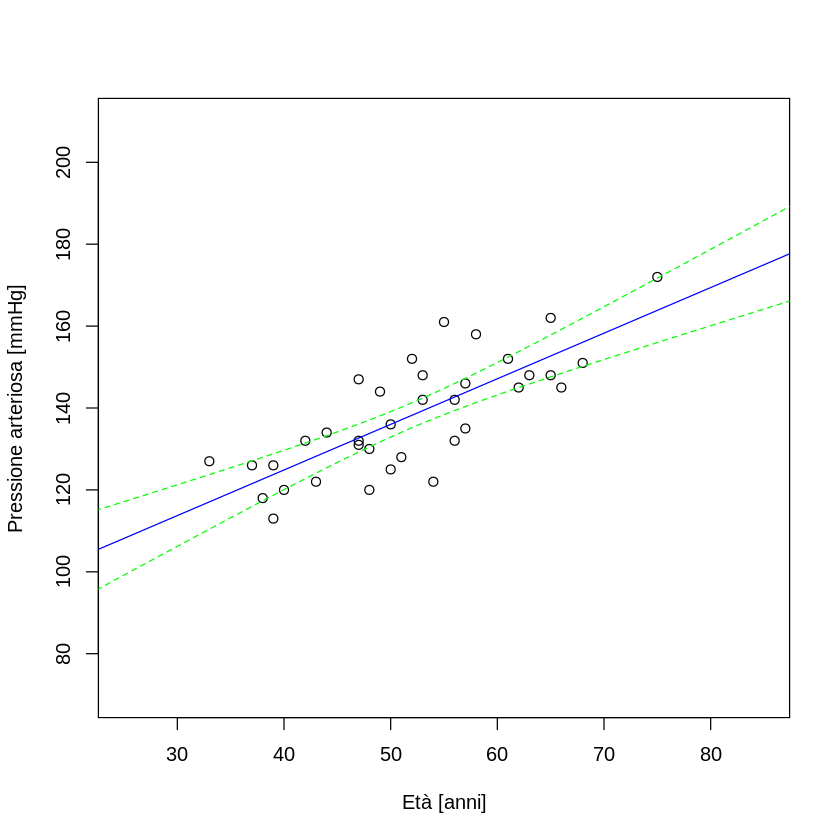

In [25]:
plot(x_eta, y_pressione, 
     xlab = "Età [anni]", ylab = "Pressione arteriosa [mmHg]",
     ylim = c(70, 210), xlim = c(25, 85))
abline(a = beta0_hat, #intercetta
       b = beta1_hat,
      col="blue") #coefficiente angolare

lines(x_eta_new, conf_interval[, 2], lty = 2, col = "green")
lines(x_eta_new, conf_interval[, 3], lty = 2, col = "green")

## Bande di previsione
Calcola allo stesso modo le bande di previsioni e sovrapponile al grafico precedente.

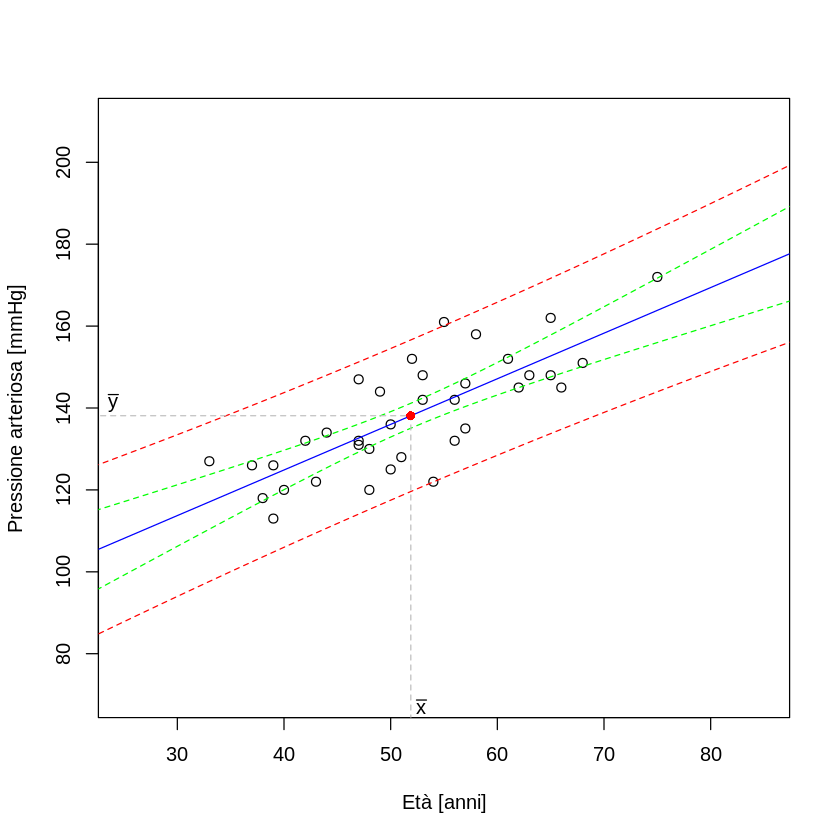

In [26]:
pred_interval <- predict(modello_regressione, interval = "prediction",
                         newdata = data.frame(eta = x_eta_new))

plot(x_eta, y_pressione, 
     xlab = "Età [anni]", ylab = "Pressione arteriosa [mmHg]",
     ylim = c(70, 210), xlim = c(25, 85))
abline(a = beta0_hat, #intercetta
       b = beta1_hat,
      col="blue") #coefficiente angolare

lines(x_eta_new, conf_interval[, 2], lty = 2, col = "green")
lines(x_eta_new, conf_interval[, 3], lty = 2, col = "green")

lines(x_eta_new, pred_interval[, 2], lty = 2, col = "red")
lines(x_eta_new, pred_interval[, 3], lty = 2, col = "red")

#baricentro
mean.x <- mean(x_eta)
mean.y <- mean(y_pressione)
segments (mean.x, 0, mean.x, mean.y,  lty = 2, col="grey")
segments (20, mean.y, mean.x, mean.y,  lty = 2, col="grey")
points(mean.x, mean.y, col = "red", pch = 16)
text(mean.x+1, 67, bquote(bar(x)))
text(24,mean.y+3, bquote(bar(y)))

Si dimostra, ed è facile osservarlo graficamente, che sia le bande di confidenza, che quelle di previsione, sono più strette intorno al baricentro dei punti, di coordinate $(\bar x, \bar y)$ (indicato in rosso), e si allargano man mano che i valori di $x$ si allontanano da $\bar x$.
Il che significa che più i valori di $x$ si allontanano da $\bar x$ maggiore è l'incertezza sia 
* nello stimare attraverso $\hat y=\hat \beta_0+ \hat \beta_1x$ la media $\mu_{y|x}=\beta_0+\beta_1x$
* che nel prevedere attraverso $\hat y_0=\hat \beta_0+ \hat \beta_1x_0$ l'osservazione futura $y_0$ conoscendone il corrispondente valore di covariata $x_0$.

A differenza degli **errori** $\varepsilon_i=y_i-(\beta_0+\beta_1x_i)$ che sono indipendenti ed hanno tutti stessa varianza pari a $\sigma_{\varepsilon}$, per i **residui** $\hat \varepsilon_i=y_i-\hat y_i$ si può dimostrare che 
* non sono indipendenti, ma correlati dal fatto che devono minimizzare le somme degli scarti al quadrato (come hai visto nei video precedenti)
* non hanno la stessa varianza. Se fossi curioso di approfondire (ma non è necessario ricordare la relazione precisa a memoria) potrei dimostrarti che la varianza diminuisce man mano che il valore $x$ corrispondente si allontana da $\bar x$, secondo la seguente relazione 
$$ \sigma_{\hat \varepsilon_i}=\sigma_{\varepsilon} \left( 1- \frac{1}{n}-\frac{(x_i-\bar x)^2}{\sum_{k=1}^n(x_k-\bar x)^2} \right)$$
Ciò significa che i punti più lontani dal baricentro hanno una "leva" (*leverage*) maggiore e pesano maggiormente nella stima (col metodo dei minimi quadrati) del modello di regressione, rispetto ai punti vicini al baricentro. In altre parole, la perturbazione di un punto lontano dal baricentro comporta una variazione maggiore nella retta di regressione stimata rispetto alla perturbazione di un punto vicino al baricentro.

* hanno media campionaria nulla, per costruzione. Infatti 

In [27]:
mean(modello_regressione$residuals) %>% round

[1] 0

Bene, sei pronto per generalizzare questi contenuti al caso della regressione lineare multipla! Alla fine della lezione ho predisposto per te un esempio completo di ricapitolazione sia sui contenuti della regressione lineare semplice che multipla. Lo stesso vale per i quiz.
Buon proseguimento!